# Enhanced Insights from Kenya Demographic and Health Survey's Malaria Indicator Survey Data: Malaria Prediction


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0 Introduction

Malaria continues to be a significant public health challenge in Kenya, with substantial efforts dedicated to its prevention and control. The Kenya Demographic and Health Survey's Malaria Indicator Survey (KDHS-MIS) provides a rich source of data that, when analyzed using advanced machine learning (ML) techniques, can offer valuable insights and enhance our understanding of malaria prevalence, risk factors, and intervention effectiveness.

## 1.1 Overview of KDHS:

The Kenya Demographic and Health Survey (KDHS) is a nationally representative survey conducted in Kenya to gather comprehensive information on population demographics, health, and various related indicators. The KDHS is conducted periodically, typically every five years, and is an essential tool for policymakers, researchers, and organizations involved in public health planning and implementation. The survey aims to provide up-to-date and accurate data on key health and demographic indicators, serving as a foundation for evidence-based decision-making in the health sector.

The KDHS covers a broad range of topics, including fertility, family planning, maternal and child health, nutrition, malaria, HIV/AIDS, and other health-related issues. By employing rigorous sampling techniques, the survey ensures that the collected data is representative of the entire Kenyan population. Through face-to-face interviews and biomarker measurements, the KDHS captures not only self-reported information but also objective health indicators, enhancing the reliability and validity of the findings. This extensive dataset serves as a valuable resource for understanding health trends, identifying challenges, and formulating targeted interventions to improve the overall health and well-being of the Kenyan population.

The survey results are crucial for monitoring progress towards health-related Sustainable Development Goals (SDGs) and informing policies and programs aimed at addressing public health challenges. Researchers and policymakers use KDHS data to analyze trends, identify disparities across regions and population groups, and tailor interventions to specific needs. The KDHS thus plays a pivotal role in shaping the health agenda in Kenya by providing a comprehensive and current snapshot of the health and demographic landscape, facilitating evidence-based decision-making for the benefit of public health initiatives and the overall well-being of the Kenyan population.


## 1.2 Business Problem

The problem at hand revolves around the underexplored potential of leveraging machine learning (ML) techniques for a more in-depth analysis of the Kenya Demographic and Health Survey's Malaria Indicator Survey (KDHS-MIS) data. Despite substantial efforts dedicated to malaria prevention and control in Kenya, the current analytical methods fall short in providing a comprehensive understanding of malaria prevalence, risk factors, and the efficacy of control measures. The lack of systematic application of ML algorithms inhibits the identification of intricate patterns and trends within the KDHS-MIS data, limiting our ability to uncover predictive factors associated with malaria prevalence. Additionally, the absence of predictive models for malaria occurrence, severity, and spatial distribution hampers the formulation of targeted intervention strategies. The problem is further compounded by the limited depth in evaluating the effectiveness of existing control measures, as traditional statistical methods may not capture the nuances that ML models can reveal in terms of accuracy, sensitivity, and specificity.

To address this gap, a structured methodology is proposed, encompassing comprehensive data preprocessing, robust feature selection techniques considering socio-economic, demographic, environmental, and health-related factors, and the development of predictive models using both supervised and unsupervised learning approaches. The proposed research emphasizes the importance of model evaluation, interpretability, and explainability to ensure the practical utility of ML findings for policymakers and public health practitioners. By integrating ML into the analysis of KDHS-MIS data, the research aims to contribute to evidence-based decision-making and enhance the effectiveness of malaria control strategies in Kenya, offering a transformative approach to understanding and combatting malaria in the region. The envisioned outcome is a more nuanced and actionable set of insights derived from ML, enabling targeted interventions and contributing to the broader goal of malaria control and prevention in Kenya.

## 1.3 Objectives

i.	Apply machine learning algorithms to analyze KMIS data and identify potential predictive factors associated with malaria prevalence.

ii.	To find out the top 5 counties with high malaria cases for enhanced intervention measures.

iii. To develop arobust machine learning model for malaria disease prediction with over 96% accuracy.


## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

The data available is relevant for the intended analysis and predictions

## 2.1) Reading the Data

### 2.1.1) Installations

In [1]:
# installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl
# %pip install seaborn --upgrade


### 2.1.2) Importing Relevant Libraries

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, roc_curve,roc_auc_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, auc, matthews_corrcoef, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import subprocess
import requests

### 2.1.3) Reading the Data

In [3]:
# Reading downloaded relevant data
df_2, meta_2 = pyreadstat.read_sav("./data/KEHR81FL.SAV")

In [4]:
df_2.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2.shape

(7952, 1955)

In [6]:
# Converting column names for df_2 to labels dictionary to a DataFrame
labels_df_2 = pd.DataFrame(list(meta_2.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = './Output/column_names_to_labels_2.xlsx'
labels_df_2.to_excel(excel_file_path, index=False)

In [7]:
# List of categorical and numerical columns
categorical_variables = list(meta_2.variable_to_label.keys())
numerical_variables = [var_name for var_name in meta_2.column_names if var_name not in categorical_variables]

print("Categorical Variables:", categorical_variables)
print("Numerical Variables:", numerical_variables)

Categorical Variables: ['HV003', 'HV015', 'HV020', 'HV022', 'HV023', 'HV024', 'HV025', 'HV026', 'HV027', 'HV042', 'HV045A', 'HV045B', 'HV045C', 'HV046', 'HV803', 'HV201', 'HV202', 'HV201A', 'HV204', 'HV205', 'HV206', 'HV207', 'HV208', 'HV209', 'HV210', 'HV211', 'HV212', 'HV213', 'HV214', 'HV215', 'HV217', 'HV219', 'HV220', 'HV221', 'HV225', 'HV226', 'HV227', 'HV228', 'HV235', 'HV238', 'HV238A', 'HV239', 'HV240', 'HV241', 'HV242', 'HV243A', 'HV243B', 'HV243C', 'HV243D', 'HV243E', 'HV244', 'HV245', 'HV246', 'HV246A', 'HV246B', 'HV246C', 'HV246D', 'HV246E', 'HV246F', 'HV246G', 'HV246H', 'HV246I', 'HV246J', 'HV246K', 'HV247', 'HV270', 'HV270A', 'HML1', 'SHCOUNTY', 'SHZONE', 'SH109', 'SH110', 'SH116G', 'SH116H', 'SH116I', 'SH116J', 'SH116K', 'SH116L', 'SH116M', 'SH116N', 'SH116O', 'SH116P', 'SH119', 'SH119A', 'HV101$01', 'HV101$02', 'HV101$03', 'HV101$04', 'HV101$05', 'HV101$06', 'HV101$07', 'HV101$08', 'HV101$09', 'HV101$10', 'HV101$11', 'HV101$12', 'HV101$13', 'HV101$14', 'HV101$15', 'HV1

In [8]:
# Extracting unique prefixes before $ for repeated variables
unique_prefixes = list(set(col.split('$')[0] for col in df_2.columns))
print("Unique Prefixes:", unique_prefixes)

Unique Prefixes: ['HV028', 'HV246I', 'HC58', 'HV225', 'SH116J', 'HV206', 'SH116I', 'HV270A', 'HV244', 'HV012', 'SH116P', 'HV215', 'HV216', 'SH119A', 'SB115G', 'SB115F', 'HC68', 'SB115H', 'SH116O', 'HV208', 'HC64', 'HC60', 'HV226', 'HV212', 'HHID', 'HV242', 'HV030', 'HML10', 'HML23', 'HML13', 'HML19', 'HML32C', 'HML1A', 'SH116G', 'HC18', 'SB115D', 'HV010', 'HV243E', 'HV204', 'SB123', 'HML33', 'HV103', 'HV218', 'HV014', 'HC61', 'SH130', 'HML18', 'HC63', 'HV005', 'HV015', 'SH116L', 'HV102', 'HV802', 'HV025', 'HV211', 'HV007', 'HV120', 'HML6', 'HV207', 'HC27', 'SB128Y', 'HV032', 'SH116M', 'HV247', 'HV243B', 'HV243A', 'HML21', 'HV246E', 'HML8', 'HVIDX', 'HV001', 'HV270', 'HV045B', 'HV807C', 'SHC1A', 'SH116K', 'HV009', 'HML2', 'HV246F', 'HML36', 'HV117', 'HV004', 'HV017', 'HC20', 'SH116H', 'HV807Y', 'HV214', 'SHC1', 'HV023', 'HV105', 'SHZONE', 'HV018', 'HML31', 'HV246G', 'SB115B', 'HV021', 'HV008A', 'HV219', 'HV240', 'HML4', 'SH110', 'HC52', 'HMLD', 'HV006', 'HV241', 'HC57', 'HC17', 'HV246',

In [9]:

def collapse_columns(df, prefix, suffixes, combined_column):
    # Extracting columns with the specified prefix and suffixes
    relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

    # Creating a new column 'combined_column' with the highest value for each row
    df[combined_column] = df[relevant_columns].max(axis=1)

    # Dropping the original columns
    df.drop(relevant_columns, axis=1, inplace=True)

    return df

def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
    filtered_columns = [col for col in df.columns if col.startswith(prefix)]
    modified_columns = [col[exclude_first_n:] for col in filtered_columns]
    return modified_columns

In [10]:
# Looping through a list of columns to combine them
columns = list(set([col.split('$')[0] for col in df_2.columns if '$' in col]))

for i in columns:
    df_2_suffixes = filter_and_exclude_prefix(df_2, f'{i}$')
    df_2 = collapse_columns(df_2, f'{i}$', df_2_suffixes, f'{i}_combined')

In [11]:
print(columns)

['HC58', 'SB115G', 'SB115F', 'HC68', 'SB115H', 'HC64', 'HC60', 'HML23', 'HML10', 'HML13', 'HML19', 'HML32C', 'HC18', 'SB115D', 'SB123', 'HML33', 'HV103', 'HC61', 'SH130', 'HML18', 'HC63', 'HV102', 'HV120', 'HML6', 'HC27', 'SB128Y', 'HML21', 'HML8', 'HVIDX', 'SHC1A', 'HML36', 'HV117', 'HC20', 'SHC1', 'HV105', 'HML31', 'SB115B', 'HML4', 'HC52', 'HMLD', 'HC57', 'HC17', 'HC55', 'HML32A', 'HML32F', 'SB119', 'HC1A', 'HML32E', 'HC53', 'HV101', 'HML5', 'HML11', 'SB115E', 'HC33', 'SB128D', 'SML16A', 'SB128M', 'HC16', 'HC56', 'HML16', 'HML22', 'HML15', 'HMLC', 'HML17', 'HC62', 'HMLB', 'HC32', 'HC1', 'HML7', 'HML9', 'HML32', 'HML14', 'SB115A', 'HML16A', 'HML30', 'HMLIDX', 'HML32B', 'HML12', 'HC31', 'HML20', 'HML32D', 'HC21', 'SB115C', 'HML34', 'HMLA', 'HC32A', 'HC51', 'HV104', 'HC19', 'HC30', 'HML3', 'HMHIDX', 'SB122', 'HML32G', 'HMLE', 'HC0', 'HML35']


In [12]:
# Updated list of categorical and numerical columns
updated_categorical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in categorical_variables]))
updated_numerical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in numerical_variables]))

print("Categorical Variables:", updated_categorical_variables)
print("Numerical Variables:", updated_numerical_variables)

Categorical Variables: ['HML32D_combined', 'HV246I', 'HV225', 'SH116J', 'SB128D_combined', 'HV206', 'SH116I', 'HC55_combined', 'HV270A', 'HML32G_combined', 'HML16_combined', 'HV244', 'SH116P', 'HV215', 'SH119A', 'SB128Y_combined', 'HML32F_combined', 'HC62_combined', 'SH116O', 'HV208', 'HML20_combined', 'HV226', 'HV212', 'HC60_combined', 'HV242', 'SH116G', 'HV243E', 'HV204', 'HV103_combined', 'HC58_combined', 'SB122_combined', 'HC27_combined', 'HV015', 'HML3_combined', 'HML16A_combined', 'SH116L', 'HV025', 'HV211', 'HML21_combined', 'HML32E_combined', 'HV207', 'HML33_combined', 'SH116M', 'HML30_combined', 'HV247', 'HV243B', 'HV243A', 'HML19_combined', 'HML32A_combined', 'HV246E', 'HV270', 'HV120_combined', 'HV045B', 'HML18_combined', 'SH116K', 'HV246F', 'SB115F_combined', 'SH116H', 'HML7_combined', 'HV214', 'HV023', 'SHZONE', 'HV246G', 'HV219', 'HV240', 'HML23_combined', 'SH110', 'HML32_combined', 'HV241', 'HV102_combined', 'HC31_combined', 'HML6_combined', 'HV246', 'HV027', 'HC1_combin

In [13]:
df_2.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HV104_combined,HC19_combined,HC30_combined,HML3_combined,HMHIDX_combined,SB122_combined,HML32G_combined,HMLE_combined,HC0_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,12.0,1.0,8.0,NaN,NaN,NaN,7.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,10.0,NaN,7.0,NaN,NaN,NaN,6.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,8.0,1.0,6.0,NaN,NaN,NaN,6.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,4.0,1.0,4.0,NaN,NaN,NaN,4.0,0.0


In [14]:
df_2.shape

(7952, 223)

In [15]:
# Replacing empty(missing values) with NaN
df_2.replace(' ',np.nan, inplace=True)
df_2.replace("",np.nan, inplace=True)

In [16]:
# List of categorical and numerical columns
categorical_variables = list(meta_2.variable_to_label.keys())
numerical_variables = [var_name for var_name in meta_2.column_names if var_name not in categorical_variables]

print("Categorical Variables:", categorical_variables)
print("Numerical Variables:", numerical_variables)

Categorical Variables: ['HV003', 'HV015', 'HV020', 'HV022', 'HV023', 'HV024', 'HV025', 'HV026', 'HV027', 'HV042', 'HV045A', 'HV045B', 'HV045C', 'HV046', 'HV803', 'HV201', 'HV202', 'HV201A', 'HV204', 'HV205', 'HV206', 'HV207', 'HV208', 'HV209', 'HV210', 'HV211', 'HV212', 'HV213', 'HV214', 'HV215', 'HV217', 'HV219', 'HV220', 'HV221', 'HV225', 'HV226', 'HV227', 'HV228', 'HV235', 'HV238', 'HV238A', 'HV239', 'HV240', 'HV241', 'HV242', 'HV243A', 'HV243B', 'HV243C', 'HV243D', 'HV243E', 'HV244', 'HV245', 'HV246', 'HV246A', 'HV246B', 'HV246C', 'HV246D', 'HV246E', 'HV246F', 'HV246G', 'HV246H', 'HV246I', 'HV246J', 'HV246K', 'HV247', 'HV270', 'HV270A', 'HML1', 'SHCOUNTY', 'SHZONE', 'SH109', 'SH110', 'SH116G', 'SH116H', 'SH116I', 'SH116J', 'SH116K', 'SH116L', 'SH116M', 'SH116N', 'SH116O', 'SH116P', 'SH119', 'SH119A', 'HV101$01', 'HV101$02', 'HV101$03', 'HV101$04', 'HV101$05', 'HV101$06', 'HV101$07', 'HV101$08', 'HV101$09', 'HV101$10', 'HV101$11', 'HV101$12', 'HV101$13', 'HV101$14', 'HV101$15', 'HV1

In [17]:
# Extracting unique prefixes before $ for repeated variables
unique_prefixes = list(set(col.split('$')[0] for col in df_2.columns))
print("Unique Prefixes:", unique_prefixes)

Unique Prefixes: ['HML32D_combined', 'HV028', 'HV246I', 'HV225', 'SH116J', 'SB128D_combined', 'HV206', 'SH116I', 'HC55_combined', 'SML16A_combined', 'HV270A', 'HML32G_combined', 'HML16_combined', 'HV244', 'HV012', 'SH116P', 'HV215', 'HV216', 'SH119A', 'SB128Y_combined', 'HML32F_combined', 'HC62_combined', 'SH116O', 'HV208', 'HML20_combined', 'HV226', 'HV212', 'HC60_combined', 'HMLD_combined', 'HHID', 'HV242', 'HV030', 'HML1A', 'SH116G', 'HV010', 'HV243E', 'HV204', 'HV103_combined', 'HV218', 'HV014', 'HC58_combined', 'HC20_combined', 'SB122_combined', 'HC27_combined', 'HV005', 'HV015', 'HML3_combined', 'HC21_combined', 'HML16A_combined', 'HML14_combined', 'SH116L', 'HV802', 'HV025', 'HV211', 'HV007', 'HML21_combined', 'HML32E_combined', 'HV207', 'HML33_combined', 'HC32A_combined', 'HVIDX_combined', 'HV032', 'SH116M', 'HML30_combined', 'HV247', 'HV243B', 'HV243A', 'HML19_combined', 'HML32A_combined', 'HV246E', 'HV001', 'HV270', 'HV120_combined', 'HV045B', 'HV807C', 'HML18_combined', 'SH1

In [18]:
def collapse_columns(df, prefix, suffixes, combined_column):
    # Extracting columns with the specified prefix and suffixes
    relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

    # Creating a new column 'combined_column' with the highest value for each row
    df[combined_column] = df[relevant_columns].max(axis=1)

    # Dropping the original columns
    df.drop(relevant_columns, axis=1, inplace=True)

    return df

def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
    filtered_columns = [col for col in df.columns if col.startswith(prefix)]
    modified_columns = [col[exclude_first_n:] for col in filtered_columns]
    return modified_columns

In [19]:
# Looping through a list of columns to combine them
columns = list(set([col.split('$')[0] for col in df_2.columns if '$' in col]))

for i in columns:
    df_2_suffixes = filter_and_exclude_prefix(df_2, f'{i}$')
    df_2 = collapse_columns(df_2, f'{i}$', df_2_suffixes, f'{i}_combined')

In [20]:
columns

[]

In [21]:
# Updated list of categorical and numerical columns
updated_categorical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in categorical_variables]))
updated_numerical_variables = list(set([col.split('$')[0] + '_combined' if '$' in col else col for col in numerical_variables]))

print("Categorical Variables:", updated_categorical_variables)
print("Numerical Variables:", updated_numerical_variables)

Categorical Variables: ['HML32D_combined', 'HV246I', 'HV225', 'SH116J', 'SB128D_combined', 'HV206', 'SH116I', 'HC55_combined', 'HV270A', 'HML32G_combined', 'HML16_combined', 'HV244', 'SH116P', 'HV215', 'SH119A', 'SB128Y_combined', 'HML32F_combined', 'HC62_combined', 'SH116O', 'HV208', 'HML20_combined', 'HV226', 'HV212', 'HC60_combined', 'HV242', 'SH116G', 'HV243E', 'HV204', 'HV103_combined', 'HC58_combined', 'SB122_combined', 'HC27_combined', 'HV015', 'HML3_combined', 'HML16A_combined', 'SH116L', 'HV025', 'HV211', 'HML21_combined', 'HML32E_combined', 'HV207', 'HML33_combined', 'SH116M', 'HML30_combined', 'HV247', 'HV243B', 'HV243A', 'HML19_combined', 'HML32A_combined', 'HV246E', 'HV270', 'HV120_combined', 'HV045B', 'HML18_combined', 'SH116K', 'HV246F', 'SB115F_combined', 'SH116H', 'HML7_combined', 'HV214', 'HV023', 'SHZONE', 'HV246G', 'HV219', 'HV240', 'HML23_combined', 'SH110', 'HML32_combined', 'HV241', 'HV102_combined', 'HC31_combined', 'HML6_combined', 'HV246', 'HV027', 'HC1_combin

In [22]:
df_2.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HV104_combined,HC19_combined,HC30_combined,HML3_combined,HMHIDX_combined,SB122_combined,HML32G_combined,HMLE_combined,HC0_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,12.0,1.0,8.0,NaN,NaN,NaN,7.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,10.0,NaN,7.0,NaN,NaN,NaN,6.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,8.0,1.0,6.0,NaN,NaN,NaN,6.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,2.0,2020.0,4.0,1.0,4.0,NaN,NaN,NaN,4.0,0.0


In [23]:
df_2.shape

(7952, 223)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Columns: 223 entries, HHID to HML35_combined
dtypes: float64(220), object(3)
memory usage: 13.5+ MB


In [25]:
# Replacing empty(missing values) with NaN
df_2.replace(' ',np.nan, inplace=True)
df_2.replace("",np.nan, inplace=True)

In [26]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    # Sorting the DataFrame by "NaN Percentage" in descending order
    columns_with_nan = columns_with_nan.sort_values(by='NaN Percentage', ascending=False)

    return columns_with_nan

# Example: Calling the function on df_cleaned
result = missing_values_summary(df_2)
result


,Column,NaN Count,NaN Percentage
13,HV011,7952,100.000000
173,HML32E_combined,7952,100.000000
149,HML6_combined,7952,100.000000
153,HML8_combined,7952,100.000000
21,HV019,7952,100.000000
...,...,...,...
145,HML18_combined,2706,34.029175
76,HV235,2225,27.980382
113,SH110,1917,24.107143
72,HV225,600,7.545272


In [27]:
# Dropping 100% missing values
df_2_cleaned = df_2.dropna(axis=1, how='all')

In [28]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
169,HML15_combined,7949,99.962274
178,HML14_combined,7832,98.490946
47,HV202,7803,98.126258
150,HMLD_combined,7721,97.095070
199,SB122_combined,7305,91.863682
...,...,...,...
132,HML18_combined,2706,34.029175
70,HV235,2225,27.980382
101,SH110,1917,24.107143
66,HV225,600,7.545272


In [29]:
df_2_cleaned['HML32_combined'].value_counts()

HML32_combined
0.0    4160
1.0     595
Name: count, dtype: int64

In [30]:
df_2_cleaned.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HC32A_combined,HC51_combined,HV104_combined,HC19_combined,HC30_combined,HML3_combined,HMHIDX_combined,SB122_combined,HC0_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,43822.0,8.0,2.0,2020.0,12.0,1.0,8.0,NaN,7.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,43179.0,2.0,2.0,2020.0,10.0,NaN,7.0,NaN,6.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,43887.0,1.0,2.0,2020.0,8.0,1.0,6.0,NaN,6.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,43557.0,1.0,2.0,2020.0,4.0,1.0,4.0,NaN,4.0,0.0


In [31]:
df_2_cleaned.shape

(7952, 202)

In [32]:
# # Calculating the threshold for 58% empty columns
threshold_2 = 0.58 * len(df_2)
# Dropping columns with 60% or more empty values
df_2_cleaned = df_2.dropna(axis=1, thresh=threshold_2)
# Displaying the cleaned DataFrame
df_2_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HMLA_combined,HC32A_combined,HC51_combined,HV104_combined,HC19_combined,HC30_combined,HML3_combined,HMHIDX_combined,HC0_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,8.0,43822.0,8.0,2.0,2020.0,12.0,1.0,8.0,7.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,43179.0,2.0,2.0,2020.0,10.0,NaN,7.0,6.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,5.0,43887.0,1.0,2.0,2020.0,8.0,1.0,6.0,6.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,43557.0,1.0,2.0,2020.0,4.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,3.0,40597.0,1.0,2.0,2020.0,7.0,1.0,5.0,5.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,2.0,42968.0,1.0,2.0,2020.0,8.0,1.0,5.0,5.0,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,39155.0,1.0,2.0,2020.0,4.0,0.0,4.0,4.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,5.0,43387.0,1.0,2.0,2020.0,10.0,1.0,6.0,6.0,1.0


In [33]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage
154,HML32_combined,3197,40.203722
165,HMLA_combined,3192,40.140845
174,HML35_combined,3191,40.128270
134,HC57_combined,3191,40.128270
147,HC56_combined,3191,40.128270
163,HC21_combined,3069,38.594064
126,HML36_combined,3069,38.594064
116,HML33_combined,2957,37.185614
122,SB128Y_combined,2952,37.122736
139,HC53_combined,2952,37.122736


In [34]:
# Converting Coded column names into readable column names for df_2
# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary_2.xlsx'
df_excel_2 = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel_2)

Original Excel DataFrame:
         Column Names                                   Label Names  \
0                HHID                                  household_id   
1               HV000                                  country_code   
2               HV001                               cluster_number    
3               HV002                              household_number   
4               HV003                    respondent's_ line_number    
...               ...                                           ...   
2047  HML16A_combined                           child_age_in_months   
2048   HML30_combined                         caretaker_line_number   
2049   HML31_combined         na_read_consent_statement_for_malaria   
2050   HML36_combined             fieldworker_malaria_measurer_code   
2051  SML16A_combined  childs_age_in_months_country_specific_hml16a   

                                            Description  
0                                   Case Identification  
1    

In [35]:
# Converting Coded column names into readable column names for df_2

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary_2.xlsx'
df_excel_2 = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel_2)

# Creating a dictionary mapping old column names to new column labels
column_mapping = dict(zip(df_excel_2['Column Names'], df_excel_2['Label Names']))

# Renaming the column headers
df_2_cleaned.rename(columns=column_mapping, inplace=True)

# Displaying the DataFrame with the updated column headers
df_2_cleaned

Original Excel DataFrame:
         Column Names                                   Label Names  \
0                HHID                                  household_id   
1               HV000                                  country_code   
2               HV001                               cluster_number    
3               HV002                              household_number   
4               HV003                    respondent's_ line_number    
...               ...                                           ...   
2047  HML16A_combined                           child_age_in_months   
2048   HML30_combined                         caretaker_line_number   
2049   HML31_combined         na_read_consent_statement_for_malaria   
2050   HML36_combined             fieldworker_malaria_measurer_code   
2051  SML16A_combined  childs_age_in_months_country_specific_hml16a   

                                            Description  
0                                   Case Identification  
1    

<ipython-input-35-75ae64285bc8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned.rename(columns=column_mapping, inplace=True)


,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,line_number_of_person_slept_in_net,century_day_code_of_birth,line_number_of_parent_caretaker,sex_of_member,date_measured_year,month_of_birth,net_observed_by_interviewer,index_to_household_schedule_hmhidx,index_to_household_schedule_hc0,rapid_test_result
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,8.0,43822.0,8.0,2.0,2020.0,12.0,1.0,8.0,7.0,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,43179.0,2.0,2.0,2020.0,10.0,NaN,7.0,6.0,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,5.0,43887.0,1.0,2.0,2020.0,8.0,1.0,6.0,6.0,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,1.0,43557.0,1.0,2.0,2020.0,4.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,3.0,40597.0,1.0,2.0,2020.0,7.0,1.0,5.0,5.0,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,2.0,42968.0,1.0,2.0,2020.0,8.0,1.0,5.0,5.0,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,39155.0,1.0,2.0,2020.0,4.0,0.0,4.0,4.0,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,5.0,43387.0,1.0,2.0,2020.0,10.0,1.0,6.0,6.0,1.0


In [36]:
# column names df_2_cleaned
for col in df_2_cleaned.columns:
    print(col)

household_id
country_code
cluster_number 
household_number
respondent's_ line_number 
area_unit
sample_weight
month_of_the_household_interview
year_of_the_household_interview
month_date_of_household_interview
day_date_of_household_interview
number_of_household_members
number_of_eligible_women
number_of_de_jure_household_members
number_of_de_facto_household_members
number_of_children_resident
result_of_household_interview
day_of_the_household_interview
number_of_visits
interviewer_id
ever_married
primary_sampling_unit
strata_for_sampling_errors
sample_design
region_of_residence 
type_of_place
male_survey
sample_weight_male
field_supervisor
children_under_five
cluster_altitude
women_height_weight_measured
household_hemoglobin_measurements
questionnaire_language
interview_language
respodent_native_language
translator_used
interview_start_time
interview_end_time
interview_length
number_of_visits_for_biomarker
day_of_biomarker_visit
month_of_biomarker_visit
year_of_biomarker_visit
date_of_b

In [37]:
df_2_cleaned['final_blood_smear_test'].value_counts()

final_blood_smear_test
0.0    4160
1.0     595
Name: count, dtype: int64

In [38]:
# Variable label dictionary
variable_label_2 = meta_2.variable_value_labels

In [39]:
# Getting variable labels
def get_variable_label(column_label, df_excel, variable_labels, suffix="$01"):
    '''Function to get variable label'''

    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Replacing "_combined" with specified suffix in column name
    if corresponding_column_name is not None:
        corresponding_column_name = corresponding_column_name.replace('_combined', suffix)

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [40]:
# Calling the function to get variable labels
variable_label_type_of_place = get_variable_label('type_of_place',df_excel_2, variable_label_2, suffix="$01")
variable_label_type_of_place

{1.0: 'Urban', 2.0: 'Rural'}

In [41]:
# Changing numerical and categorical column names to list of column label names
columns_filled_with_mean_all = [df_excel_2[df_excel_2['Column Names'] == col]['Label Names'].values[0] for col in updated_numerical_variables]
columns_filled_with_mode_all = [df_excel_2[df_excel_2['Column Names'] == col]['Label Names'].values[0] for col in updated_categorical_variables]

# Unique identifiers to exclude from numeric column
columns_to_exclude = ['country_code', 'field_supervisor','household_number','area_unit','na_office_editor','cluster_number ','household_id','line_number_of_head_of_household','interviewer_id',
                      'keyer_identification','na_field_editor','line_number','fieldworker_measurer_code','fieldworker_malaria_measurer_code','index_to_household_schedule_hmhidx',
                      'index_to_household_schedule_hc0','primary_sampling_unit',"respondent's_ line_number "]

# Truncating the list to only columns in df_2_cleaned
columns_filled_with_mean_2 = [col for col in columns_filled_with_mean_all if col in df_2_cleaned.columns and col not in columns_to_exclude]
columns_filled_with_mode_2 = [col for col in columns_filled_with_mode_all if col in df_2_cleaned.columns]

print("Columns filled with mean:", columns_filled_with_mean_2)
print("Columns filled with mode:", columns_filled_with_mode_2)

Columns filled with mean: ['century_day_code_of_birth', 'sample_weight_male', 'wealth_index_factor', 'date_measured_day', 'date_measured_year', 'cluster_altitude', 'childs_age_in_months_country_specific_hml16a', 'number_of_de_jure_household_members', 'date_of_biomarker', 'no_sleep_rooms', 'date_of_biomarker_century_day_code', 'number_of_household_members', 'children_under_mosquito_net', 'interview_start_time', 'number_of_visits', 'number_of_de_facto_household_members', 'day_of_biomarker_visit', 'year_of_biomarker_visit', 'date_measured_month', 'cmc_date_of_birth', 'month_date_of_household_interview', 'wealth_index_factor_urban_rural', 'number_of_mosquito_nets_specific', 'childs_age_in_days_country_specific', 'month_of_biomarker_visit', 'day_date_of_household_interview', 'number_of_eligible_women', 'mosquito_bed_net_designation_number', 'day_of_the_household_interview', 'number_of_children_resident', 'children_under_five', 'century_day_code_of_measurement', 'month_of_the_household_inter

In [42]:
# Converting encoded categorical columns to numerical data type
df_2_cleaned[columns_filled_with_mode_2] = df_2_cleaned[columns_filled_with_mode_2].apply(pd.to_numeric, errors='coerce')

<ipython-input-42-9a1fc66e68c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_filled_with_mode_2] = df_2_cleaned[columns_filled_with_mode_2].apply(pd.to_numeric, errors='coerce')


In [43]:
# Imputing the df_2_cleaned DataFrame 

# Imputing numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])

# Imputing non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df_2_cleaned[columns_filled_with_mode_2] = non_numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mode_2])


<ipython-input-43-aeb347e9e88e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_filled_with_mean_2] = numeric_imputer.fit_transform(df_2_cleaned[columns_filled_with_mean_2])
c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\Users\Dominc\anaconda3\envs\lea

In [44]:
# Converting unique identifiers to strings
columns_to_exclude = [col for col in columns_to_exclude if col in df_2_cleaned.columns]
df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].astype(str)

<ipython-input-44-40575faddf3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].astype(str)


In [45]:
# Filling missing values in columns_to_exclude with the word "missing"
df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].fillna('missing')

<ipython-input-45-2798606aaf86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned[columns_to_exclude] = df_2_cleaned[columns_to_exclude].fillna('missing')


In [46]:
# Checking percentage of missing values on df_2_cleaned
result_2 = missing_values_summary(df_2_cleaned)
result_2

,Column,NaN Count,NaN Percentage


In [47]:
# Saving column names into an Excel file for df_2_cleaned

# Getting the column names
column_names_2 = df_2_cleaned.columns

# Creating a DataFrame with a single column containing the column names
column_names_df_2 = pd.DataFrame(column_names_2, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = './Output/cleaned_column_names_2.xlsx'

# Writing the DataFrame to the Excel file
column_names_df_2.to_excel(excel_file_path, index=False)

In [48]:
df_2_cleaned['final_blood_smear_test'].value_counts()

final_blood_smear_test
0.0    7357
1.0     595
Name: count, dtype: int64

In [49]:
columns_to_keep = ['household_id', 'number_of_household_members', 'number_of_children_resident',
                   'region_of_residence ', 'result_of_household_interview', 'ever_married', 
                   'type_of_place', 'children_under_five', 'cluster_altitude', 'household_hemoglobin_measurements',
                   'main_source_drink_water', 'time_to_water_source', 'type_toilet_facility', 'own_electricity',
                   'own_radio', 'own_television', 'own_refrigerator', 'member_own_bicycle', 'member_own_motorcycle',
                   'member_own_car', 'main_floor_material', 'main_wall_material', 'main_roof_material', 'no_sleep_rooms',
                   'household_relationship_structure', 'sex_head_household', 'age_household_head', 'household_has_telephone',
                   'shares_toilet', 'cooking_fuel_type', 'has_mosquito_net', 'location_of_source_for_water', 'toilet_location',
                   'has_mobile', 'has_watch', 'owns_animaldrawn_cart', 'owns_boat_wmotor', 'owns_computer', 'owns_agric_land',
                   'owns_livestock', 'owns_cattle', 'owns_cows_bulls', 'owns_goats', 'owns_sheep', 'owns_poultry', 'owns_horses',
                   'owns_donkeys', 'owns_mules', 'owns_pigs', 'member_has_bank_account', 'wealth_index_comb', 'wealth_index_factor',
                   'wealth_index_urban_rural', 'wealth_index_factor_urban_rural', 'number_of_mosquito_nets',
                   'number_of_mosquito_nets_specific', 'children_under_mosquito_net', 'county', 'malaria_endemicity_zone',
                   'type_of_cooking_device', 'type_of_cooking_fuel_energy', 'has_solar_panel', 'has_table', 'has_chair',
                   'has_sofa', 'has_bed', 'has_cupboard', 'has_clock', 'has_microwave', 'has_dvd_player', 'has_cd_player',
                   'use_phone_for_finc_transactions', 'used_mosquito_relellent_spray', 'usual_resident',
                   'falciparum_present', 'malariae_present', 'sex_of_member', 'anemia_level', 'someone_slept_under_net_last_night',
                   'childs_age_in_months_country_specific_hml16a', 'slept_llin_net', 'caretaker_line_number', 'brand_of_net',
                   'childs_age_in_days_country_specific', 'net_from_antenatal_immunization_visit', 'age_of_member',
                   'months_ago_net_obtained', 'net_observed_by_interviewer', 'slept_last_night', 'individual_file_pregnancy_status',
                   'female_int_eligibility', 'slept_under_net', 'line_number_of_person_slept_in_net', 'date_measured_month',
                   'final_blood_smear_test', 'children_hemoglobin_elig', 'blood_smear_bar_code', 'vivax_present',
                   'hemoglobin_level_g_dl', 'result_of_measurement_hemoglobin', 'mosquito_bed_net_designation_number',
                   'malaria_measurement_result', 'read_consent_statement_hemoglobin', 'year_of_data_collection', 'child_age_in_months',
                   'flag_age', 'ovale_present', 'corr_age', 'childs_age_in_months', 'childs_age_in_days', 'insecticide_treated_net',
                   'number_of_persons_slept_under_net', 'hemoglobin_level_adjusted_for_altitude_g_dl', 'sex', 'rapid_test_result',
                   'bed_net_type', 'sample_weight']

# Use loc to select specific columns
df_filtered = df_2_cleaned.loc[:, columns_to_keep]
df_filtered.head()

,household_id,number_of_household_members,number_of_children_resident,region_of_residence,result_of_household_interview,ever_married,type_of_place,children_under_five,cluster_altitude,household_hemoglobin_measurements,...,corr_age,childs_age_in_months,childs_age_in_days,insecticide_treated_net,number_of_persons_slept_under_net,hemoglobin_level_adjusted_for_altitude_g_dl,sex,rapid_test_result,bed_net_type,sample_weight
0,2 1,8.0,5.0,1.0,1.0,0.0,2.0,5.0,201.0,1.0,...,59.0,60.0,2501.0,1.0,2.0,125.0,2.0,0.0,1.0,588318.0
1,2 6,7.0,4.0,1.0,1.0,0.0,2.0,4.0,201.0,1.0,...,37.0,60.0,2501.0,1.0,2.0,123.0,2.0,0.0,0.0,588318.0
2,2 10,6.0,3.0,1.0,1.0,0.0,2.0,3.0,201.0,1.0,...,35.0,60.0,2501.0,1.0,4.0,100.0,1.0,1.0,1.0,588318.0
3,2 13,1.0,0.0,1.0,1.0,0.0,2.0,0.0,201.0,1.0,...,60.0,60.0,2501.0,1.0,1.0,129.0,2.0,0.0,1.0,588318.0
4,2 16,4.0,1.0,1.0,1.0,0.0,2.0,1.0,201.0,1.0,...,62.0,20.0,609.0,1.0,2.0,107.0,2.0,0.0,1.0,588318.0


# 2.3) Exploratory Data Analysis

*Here we have two major steps for good visual generation and more accurate analysis: Data Preprocessing and feature selection as illustrated:*

### a.	Data Preprocessing:

Clean and preprocess the KDHS-MIS dataset to handle missing values, and outliers, and ensure data quality.
Explore the spatial and temporal dimensions of the data to identify patterns in malaria prevalence.

### b.	Feature Selection:

Employ feature selection techniques to identify the most relevant variables influencing malaria prevalence.
Consider socio-economic, demographic, environmental, and health-related factors as potential predictors.


## A) Univariate EDA

In [50]:
# Displaying the descriptive statistics for all columns
summary_df = df_filtered.describe()

# Saving to csv
summary_df.to_csv('./Output/describe_output_summary.csv')

summary_df


,number_of_household_members,number_of_children_resident,region_of_residence,result_of_household_interview,ever_married,type_of_place,children_under_five,cluster_altitude,household_hemoglobin_measurements,main_source_drink_water,...,corr_age,childs_age_in_months,childs_age_in_days,insecticide_treated_net,number_of_persons_slept_under_net,hemoglobin_level_adjusted_for_altitude_g_dl,sex,rapid_test_result,bed_net_type,sample_weight
count,7952.000000,7952.000000,7952.000000,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.0,7952.000000,...,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7.952000e+03
mean,3.936368,1.603496,5.077842,1.0,0.0,1.567404,1.624748,1295.468939,1.0,30.304326,...,47.215921,56.882671,2317.559105,0.932470,1.919769,126.165619,1.834381,0.088783,0.774019,1.000000e+06
std,2.463717,1.707177,2.403588,0.0,0.0,0.495467,1.723288,631.162307,0.0,16.275948,...,16.978084,10.564006,508.541919,0.250954,0.786537,11.556432,0.371761,0.284448,0.837202,1.554606e+06
min,1.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,3.000000,1.0,11.000000,...,15.000000,0.000000,7.000000,0.000000,0.000000,55.000000,1.000000,0.000000,0.000000,1.178700e+04
25%,2.000000,0.000000,3.000000,1.0,0.0,1.000000,0.000000,1087.000000,1.0,13.000000,...,34.000000,60.000000,2501.000000,1.000000,2.000000,123.000000,2.000000,0.000000,0.000000,2.829410e+05
50%,4.000000,1.000000,5.000000,1.0,0.0,2.000000,1.000000,1359.000000,1.0,31.000000,...,45.000000,60.000000,2501.000000,1.000000,2.000000,129.000000,2.000000,0.000000,1.000000,5.517490e+05
75%,5.000000,3.000000,7.000000,1.0,0.0,2.000000,3.000000,1714.000000,1.0,43.000000,...,58.000000,60.000000,2501.000000,1.000000,2.000000,129.000000,2.000000,0.000000,1.000000,9.834160e+05
max,24.000000,15.000000,9.000000,1.0,0.0,2.000000,15.000000,2653.000000,1.0,71.000000,...,98.000000,60.000000,2501.000000,1.000000,4.000000,196.000000,2.000000,1.000000,3.000000,1.409980e+07


In [ ]:
# Distribution of household members in household
# Setting the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(15, 6))
ax = sns.histplot(df_2_cleaned['number_of_household_members'], bins=20, kde=True, color='skyblue')

# Adding percentages at the center of the bars
total_count = len(df_2_cleaned['number_of_household_members'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Distribution of Household Members in Each Household')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Identify the top ten households
top_10_households = df_2_cleaned.groupby('household_id')['number_of_household_members'].max().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_df = top_10_households.reset_index()

# Print the DataFrame
print("Top 10 Households with Highest Number of Household Members:")
top_10_df

In [ ]:
# Identify the top 20 households based on the sum of 'Number_of_children_resident'
top_20_households = df_filtered.groupby('household_id')['number_of_children_resident'].sum().nlargest(20)
# Create a DataFrame from the top_20_households Series
top_20_df = top_20_households.reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Plotting the distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_filtered['number_of_children_resident'], bins=20, kde=True, color='skyblue')

# Adding percentages at the center of the bars
total_count = len(df_filtered['number_of_children_resident'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Distribution of Number of Children Resident in Each Household')
plt.xlabel('Number of Children Resident')
plt.ylabel('Frequency (Count %)')
plt.show()

In [ ]:
# Print the DataFrame
print("Top 20 Households with Highest Number of Children:")
top_20_df

In [ ]:
# Household has Mosquito net
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel_2, variable_label_2, suffix="$01")
variable_label_has_net

In [ ]:
# Mapping the variable labels to the column
household_has_mosquito_net = df_filtered['has_mosquito_net'].map(variable_label_has_net).reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Plotting the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")

# Adding percentages at the center of the bars
total_count = len(household_has_mosquito_net)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()

In [ ]:
# Type of Place
# Calling the function to get variable labels
variable_label_place = get_variable_label('type_of_place',df_excel_2, variable_label_2, suffix="$01")
variable_label_place

In [ ]:
# Mapping the variable labels to the column
household_type_of_place = df_filtered['type_of_place'].map(variable_label_place).reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Plotting the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='type_of_place', data=household_type_of_place, palette="Set1")

# Adding percentages at the center of the bars
total_count = len(household_type_of_place)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Distribution of Type of Household Place')
plt.xlabel('Type of place')
plt.ylabel('Household Count')
plt.show()

In [ ]:
# Mapping the variable labels to the columns
df_filtered['has_mosquito_net_label'] = df_filtered['has_mosquito_net'].map(variable_label_has_net)
df_filtered['type_of_place_label'] = df_filtered['type_of_place'].map(variable_label_place)
# Set the style of seaborn
sns.set(style="whitegrid")

# Creating a pair plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='has_mosquito_net_label', data=df_filtered, hue='type_of_place_label', palette="Set2")

# Adding percentages at the center of the bars
total_count = len(df_filtered)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Plot of Household Has_mosquito_net and Type of Household Place')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Household Count')
plt.show()

In [ ]:
# Malaria Endemicity Zone
# Calling the function to get variable labels
variable_label__malaria_zone = get_variable_label('malaria_endemicity_zone',df_excel_2, variable_label_2, suffix="$01")
variable_label__malaria_zone

In [ ]:
# Countplot of Malaria Endemicity Zone
# Mapping the variable labels to the column
malaria_endemicity_zone = df_filtered['malaria_endemicity_zone'].map(variable_label__malaria_zone).reset_index()
# Setting the style
sns.set(style="whitegrid")
# Figure size
plt.figure(figsize=(10, 6))
# Creating the count plot
ax = sns.countplot(x='malaria_endemicity_zone', data=malaria_endemicity_zone)
# Adding percentages at the center of the bars
total_count = len(malaria_endemicity_zone)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")
# Rotating x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')
# Setting labels and title
plt.xlabel('Malaria Endemicity Zone')
plt.ylabel('Count')
plt.title('Distribution of Malaria Endemicity Zone')
# Displaying the plot
plt.show()

In [ ]:
# Household Water source
# Mapping the variable labels to the column
variable_label_water_source = get_variable_label('main_source_drink_water', df_excel_2, variable_label_2, suffix="$01")
variable_label_water_source

In [ ]:
# Mapping the variable labels to the column
household_water_source = df_filtered['main_source_drink_water'].map(variable_label_water_source).reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Counting the occurrences for each category
water_source_counts = household_water_source['main_source_drink_water'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(water_source_counts, labels=water_source_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Adding percentages at the center of the wedges
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(10)

plt.title('Distribution of Main Source of Drinking Water')
plt.show()

In [ ]:
# Household Malaria Measurement Result
# Mapping the variable labels to the column
variable_label_malaria_test_result = get_variable_label('malaria_measurement_result', df_excel_2, variable_label_2, suffix="$01")
variable_label_malaria_test_result

In [ ]:
# Mapping the variable labels to the column
household_malaria_test_result = df_filtered['malaria_measurement_result'].map(variable_label_malaria_test_result).reset_index()
# Setting the style of seaborn
sns.set(style="whitegrid")
# Plotting the count plot
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='malaria_measurement_result', data=household_malaria_test_result, palette="Set2")
# Adding percentages at the center of the bars
total_count = len(household_malaria_test_result)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Distribution of Malaria Test Results')
plt.xlabel('Malaria Test Results')
plt.ylabel('Household Count')
plt.show()

In [ ]:
# Household Region
# Mapping the variable labels to the column
variable_label_household_region = get_variable_label('region_of_residence ', df_excel_2, variable_label_2, suffix="$01")
variable_label_household_region

In [ ]:
# Household region
# Mapping the variable labels to the column
household_region = df_filtered['region_of_residence '].map(variable_label_household_region).reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Counting the occurrences for each category
region_counts = household_region['region_of_residence '].value_counts()
# Plotting the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Adding percentages at the center of the wedges
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(10)

plt.title('Distribution of Region of Residence')
plt.show()

In [ ]:
# Household Bed Net type
# Mapping the variable labels to the column
variable_label_bed_net_type = get_variable_label('bed_net_type', df_excel_2, variable_label_2, suffix="$01")
variable_label_bed_net_type

In [ ]:
# Household Bed Net type
# Mapping the variable labels to the column
bed_net_type = df_filtered['bed_net_type'].map(variable_label_bed_net_type).reset_index()
# Set the style of seaborn
sns.set(style="whitegrid")
# Counting the occurrences for each category
bed_net_type_counts = bed_net_type['bed_net_type'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(bed_net_type_counts, labels=bed_net_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
# Adding percentages at the center of the wedges
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(10)

plt.title('Distribution of Bed Net Type')
plt.show()

In [ ]:
# Time since net obtained
# Mapping the variable labels to the column
variable_label_months_ago_net_obtained = get_variable_label('months_ago_net_obtained', df_excel_2, variable_label_2, suffix="$1")
variable_label_months_ago_net_obtained

In [ ]:
# Time since net obtained
# Mapping the variable labels to the column
months_ago_net_obtained = df_filtered['months_ago_net_obtained'].map(variable_label_months_ago_net_obtained).reset_index()

# Setting the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='months_ago_net_obtained', data=months_ago_net_obtained, palette="Set2")

# Adding percentages at the center of the bars
total_count = len(months_ago_net_obtained)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Time (months) Since Net Obtained')
plt.xlabel('Time Since Net Obtained')
plt.ylabel('Household Count')
plt.show()

In [ ]:
# Child's age in days Country Specific
# Setting the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
sns.histplot(data=df_filtered, x='childs_age_in_days_country_specific', palette="Set2")
plt.title('Distribution of Time (months) Since Net Obtained')
plt.xlabel('Time Since Net Obtained')
plt.ylabel('Household Count')
plt.show()

## B) Multivariate EDA

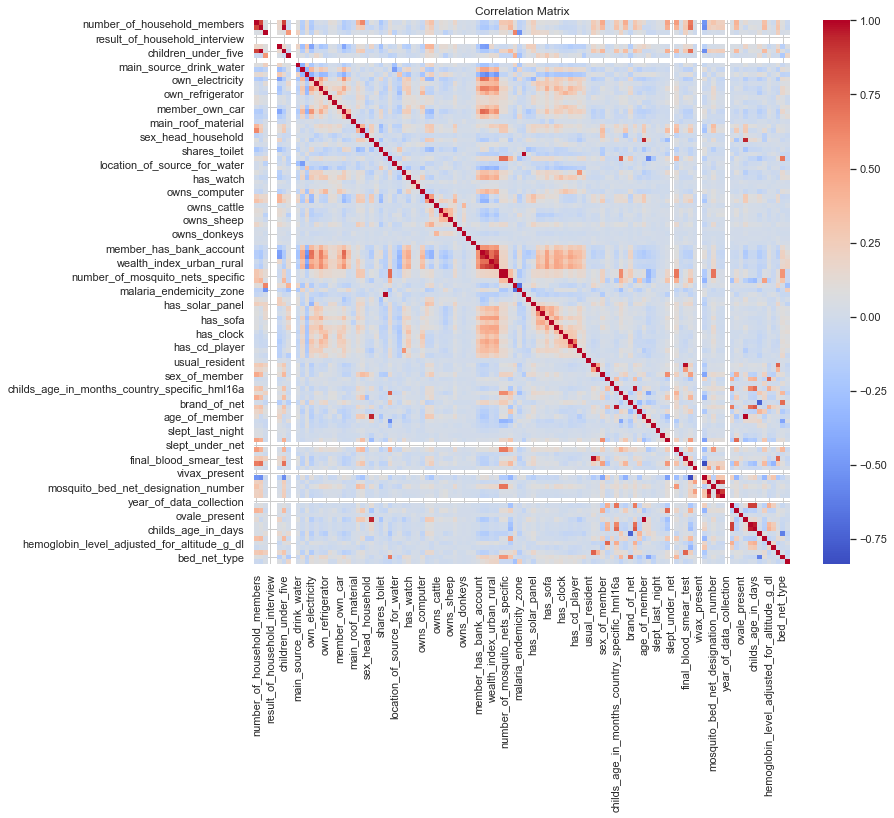

In [71]:
# Exploring the correlation matrix

# Excluding non-numeric columns
numeric_columns = df_filtered.select_dtypes(include='number').columns

# correlation matrix

corr_matrix = df_filtered[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Rapid  Test Result  rapid_test_result
# Getting the variable label for rapid_test_result
variable_label_rapid_test_result = get_variable_label('rapid_test_result', df_excel_2, variable_label_2, suffix="$01")
# Getting the variable label for region_of_residence
variable_label_region_of_residence = get_variable_label('region_of_residence ', df_excel_2, variable_label_2, suffix="$01")
rapid_test_result = df_filtered['rapid_test_result'].map(variable_label_rapid_test_result).reset_index()
rapid_test_result['region_of_residence '] = df_filtered['region_of_residence '].map(variable_label_region_of_residence)
# Setting the style of seaborn
sns.set(style="whitegrid")
# Creating the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='region_of_residence ', hue='rapid_test_result', data=rapid_test_result, palette="Set2")
# Adding percentages at the center of the bars
total_count = len(rapid_test_result)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            '{:.0%}'.format(height / total_count), ha="center")

plt.title('Malaria Cases by Region')
plt.xlabel('Region of Residence')
plt.ylabel('Count')
plt.show()

In [ ]:
# Age-Wise Analysis
# Getting the variable label for rapid_test_result
variable_label_rapid_test_result = get_variable_label('rapid_test_result', df_excel_2, variable_label_2, suffix="$01")
age_group = df_filtered['rapid_test_result'].map(variable_label_rapid_test_result).reset_index()
# Setting the style of seaborn
sns.set(style="whitegrid")
# Creating Age Groups
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
age_group['age_group'] = pd.cut(df_filtered['age_of_member'], bins=bins, labels=labels, right=False)
# Creating the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='age_group', hue='rapid_test_result', data=age_group, palette="Set2")
# Adding percentages at the center of the bars
total_count = len(age_group)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2,
            '{:.0%}'.format(width / total_count), ha="center", va="center", color="white", fontsize=8)

plt.title('Malaria Cases by Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# Distribution of Malaria Cases by Number of Children Present in Household
# Getting the variable label for rapid_test_result
variable_label_rapid_test_result = get_variable_label('rapid_test_result', df_excel_2, variable_label_2, suffix="$01")
numner_of_children = df_filtered['rapid_test_result'].map(variable_label_rapid_test_result).reset_index()
numner_of_children['number_of_children_resident'] = df_filtered['number_of_children_resident']

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='number_of_children_resident', hue='rapid_test_result', data=numner_of_children)

# Adding percentages at the center of the bars
total_count = len(numner_of_children)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2,
            '{:.0%}'.format(height / total_count), ha="center", va="center", color="white", fontsize=8)
    
plt.title('Distribution of Malaria Cases by Number of Children Present in Household')
plt.xlabel('Number of Children Present in Household')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# Distribution of Malaria Cases by County
# Getting the variable label for rapid_test_result
variable_label_rapid_test_result = get_variable_label('rapid_test_result', df_excel_2, variable_label_2, suffix="$01")
# Getting the variable label for county
variable_label_county = get_variable_label('county', df_excel_2, variable_label_2, suffix="$01")
county = df_filtered['rapid_test_result'].map(variable_label_rapid_test_result).reset_index()
county['county'] = df_filtered['county'].map(variable_label_county)
# Setting the style of seaborn
sns.set(style="whitegrid")
# Creating the plot
plt.figure(figsize=(12, 20))
ax = sns.countplot(y='county', hue='rapid_test_result', data=county)
# Adding percentages at the center of the bars
total_count = len(county)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2,
            '{:.0%}'.format(height / total_count), ha="center", va="center", color="white", fontsize=8)

plt.title('Malaria Cases by County')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

# 2.4) Modelling

## A) Model Development

*In this section we used supervised learning algorithms (Logistic Regression and Random Forest Classifier) to build predictive model for malaria.*

In [ ]:
# Train test split

# Assigning X and y splits
X = df_filtered[numeric_columns].drop('rapid_test_result', axis=1)
y = df_filtered['rapid_test_result']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Creating a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model
logistic_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Getting feature coefficients
feature_coefficients = logistic_model.coef_[0]

# Getting feature names
feature_names = X.columns

# Creating a dictionary to store feature names and their coefficients
feature_coefficient_dict = dict(zip(feature_names, feature_coefficients))

# Sorting features based on absolute coefficient values
sorted_features = sorted(feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Printing feature coefficient ranking
print("Feature Coefficient Ranking:")
for i, (feature, coefficient) in enumerate(sorted_features):
    print(f"{i + 1}. {feature}: {coefficient}")

In [ ]:
# Using a model with L1 regularization for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)
# Selecting features based on the model
sfm = SelectFromModel(lasso_model, prefit=True)
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)
# Printing selected features
selected_feature_indices = sfm.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

In [ ]:
# Training a model using the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Getting feature importances
feature_importances = model.feature_importances_

# Getting feature names
feature_names = X.columns

# Creating a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing feature importance ranking
print("Feature Importance Ranking:")
for i, (feature, importance) in enumerate(sorted_features):
    print(f"{i + 1}. {feature}: {importance}")

In [ ]:
# Creating a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [ ]:
# Getting feature importances
feature_importances = rf_model.feature_importances_

# Getting feature names
feature_names = X.columns

# Creating a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Printing feature importance ranking
print("Feature Importance Ranking:")
for i, (feature, importance) in enumerate(sorted_features):
    print(f"{i + 1}. {feature}: {importance}")

## B) Model Evaluation

*We assessed the performance of the developed models using appropriate metrics such as accuracy, sensitivity, specificity, and area under the ROC curve.*

An interpretation and explanation of the key metrics:

#### i) Accuracy:

Accuracy measures the overall correctness of the model predictions.

In this case, the model has an accuracy of approximately 96.67%, indicating that about 96.67% of the predictions are correct.

#### Confusion Matrix:

A confusion matrix provides a detailed breakdown of the model's predictions.

##### In this case:

1. True Negatives (TN): 1435 instances were correctly predicted as negative (0.0).

2. False Positives (FP): 12 instances were incorrectly predicted as positive (1.0).

3. False Negatives (FN): 41 instances were incorrectly predicted as negative (0.0).

4. True Positives (TP): 103 instances were correctly predicted as positive (1.0).

#### ii) Precision:

Precision measures the accuracy of the positive predictions made by the model.

Precision for positive results (1.0) is approximately 90%. It means that when the model predicts a positive result, it is correct about 90% of the time.

#### iii) Recall (Sensitivity):

Recall measures the model's ability to correctly identify positive instances.

Recall for positive results (1.0) is approximately 72%. It means that the model correctly identifies about 72% of the actual positive instances.

#### iv) F1-Score:

F1-score is the harmonic mean of precision and recall.

The weighted average F1-score is approximately 96%, indicating a good balance between precision and recall.

#### v)Support:

Support represents the number of actual occurrences of each class in the specified dataset.

There are 1447 instances of negative results (0.0) and 144 instances of positive results (1.0).

### Interpretation:

The model is performing well overall with high accuracy.
The precision for positive results is relatively high, indicating that when the model predicts a positive result, it is likely to be correct.

The recall for positive results is also reasonable, suggesting that the model is effective at identifying a significant portion of the actual positive instances.

The F1-score reflects a good balance between precision and recall.
The model seems to be particularly effective at correctly predicting negative results (0.0), as indicated by the high precision and recall for this class.

In [83]:
# Evaluating model based on the random forest model
# Assuming you have probabilities for the positive class from your model predictions
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


# model's ability to distinguish between positive and negative instances.
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Assuming you have your X and y variables
# Replace X and y with your actual data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming rf_model is the best trained   model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtain probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# Assuming you have your X and y variables
# Replace X and y with your actual data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming logistic_model is your trained logistic regression model
rf_model =  RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate MCC
# MCC takes into account true and false positives and negatives and is particularly useful for imbalanced datasets.
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

In [ ]:
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your true labels and predicted labels
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("MCC:", mcc)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize MCC along with other metrics
metrics_dict = {'MCC': mcc, 'Accuracy': accuracy}
sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()))
plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
# AUC-PR measures the trade-off between precision and recall.
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Assigning X and y splits
X = df_2_cleaned[numeric_columns].drop('rapid_test_result', axis=1)
y = df_2_cleaned['rapid_test_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best trained model:  rf model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Obtain probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## 2.5) Conclusion

The model does accurate predicting of malaria rapid test results.

MCC value of 0.7833 indicates strong overall model performance, taking into account both false positives and false negatives. This metric is particularly useful in situations where there is class imbalance or where the consequences of different types of errors vary.

Summarize the potential impact of leveraging machine learning on enhancing insights from KMIS data for malaria control and prevention in Kenya.
By integrating machine learning into the analysis of KMIS data, this proposal aims to contribute to evidence-based decision-making and improve the effectiveness of malaria control strategies in Kenya.

## 2.6) Recommendation

Derive actionable recommendations for policymakers and healthcare professionals based on the ML findings.
Propose targeted interventions and strategies to reduce malaria prevalence and improve the effectiveness of existing control measures.